# Regression Project 

### Project Title: Regression Project


© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
import seaborn as sns
import matplotlib.cm as cm
import json
import pingouin as pg
import missingno as msno
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
 
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (15,10)

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('co2_emissions_from_agri.csv')

# Data Collection and Description
def describe_data(df):
    print("Data Collection and Description")
    print("="*30)
    
    # Mention sources of the data
    print("\nSources of the Data:")
    print("The data is sourced from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC).")
    
    # Methods used for collection
    print("\nMethods Used for Collection:")
    print("The data was collected using APIs provided by FAO and IPCC, as well as web scraping techniques to gather additional relevant information.")
    
    # General description of the dataset
    print("\nGeneral Description of the Dataset:")
    print(f"Size of the dataset: {df.shape} rows and {df.shape} columns")
    print("Scope: The dataset includes information on CO2 emissions from the agricultural sector, including various factors such as total emissions, population, and year.")
    
    # Types of data available
    print("\nTypes of Data Available:")
    print("Numerical columns:")
    print(df.select_dtypes(include=['number']).columns.tolist())
    print("\nCategorical columns:")
    print(df.select_dtypes(include=['object']).columns.tolist())
    
    # Display the first few rows of the dataset
    print("\nFirst few rows of the dataset:")
    print(df.head())

# Call the function to describe the data
describe_data(df)

Data Collection and Description

Sources of the Data:
The data is sourced from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC).

Methods Used for Collection:
The data was collected using APIs provided by FAO and IPCC, as well as web scraping techniques to gather additional relevant information.

General Description of the Dataset:
Size of the dataset: (6965, 31) rows and (6965, 31) columns
Scope: The dataset includes information on CO2 emissions from the agricultural sector, including various factors such as total emissions, population, and year.

Types of Data Available:
Numerical columns:
['Year', 'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport', 'Forestland', 'Net Forest conversion', 'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilize

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [6]:
df = pd.read_csv('co2_emissions_from_agri.csv')

pd.set_option('display.max_columns', None)

df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [8]:
df.shape

(6965, 31)

In [10]:
df.info

<bound method DataFrame.info of              Area  Year  Savanna fires  Forest fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000            

<Axes: >

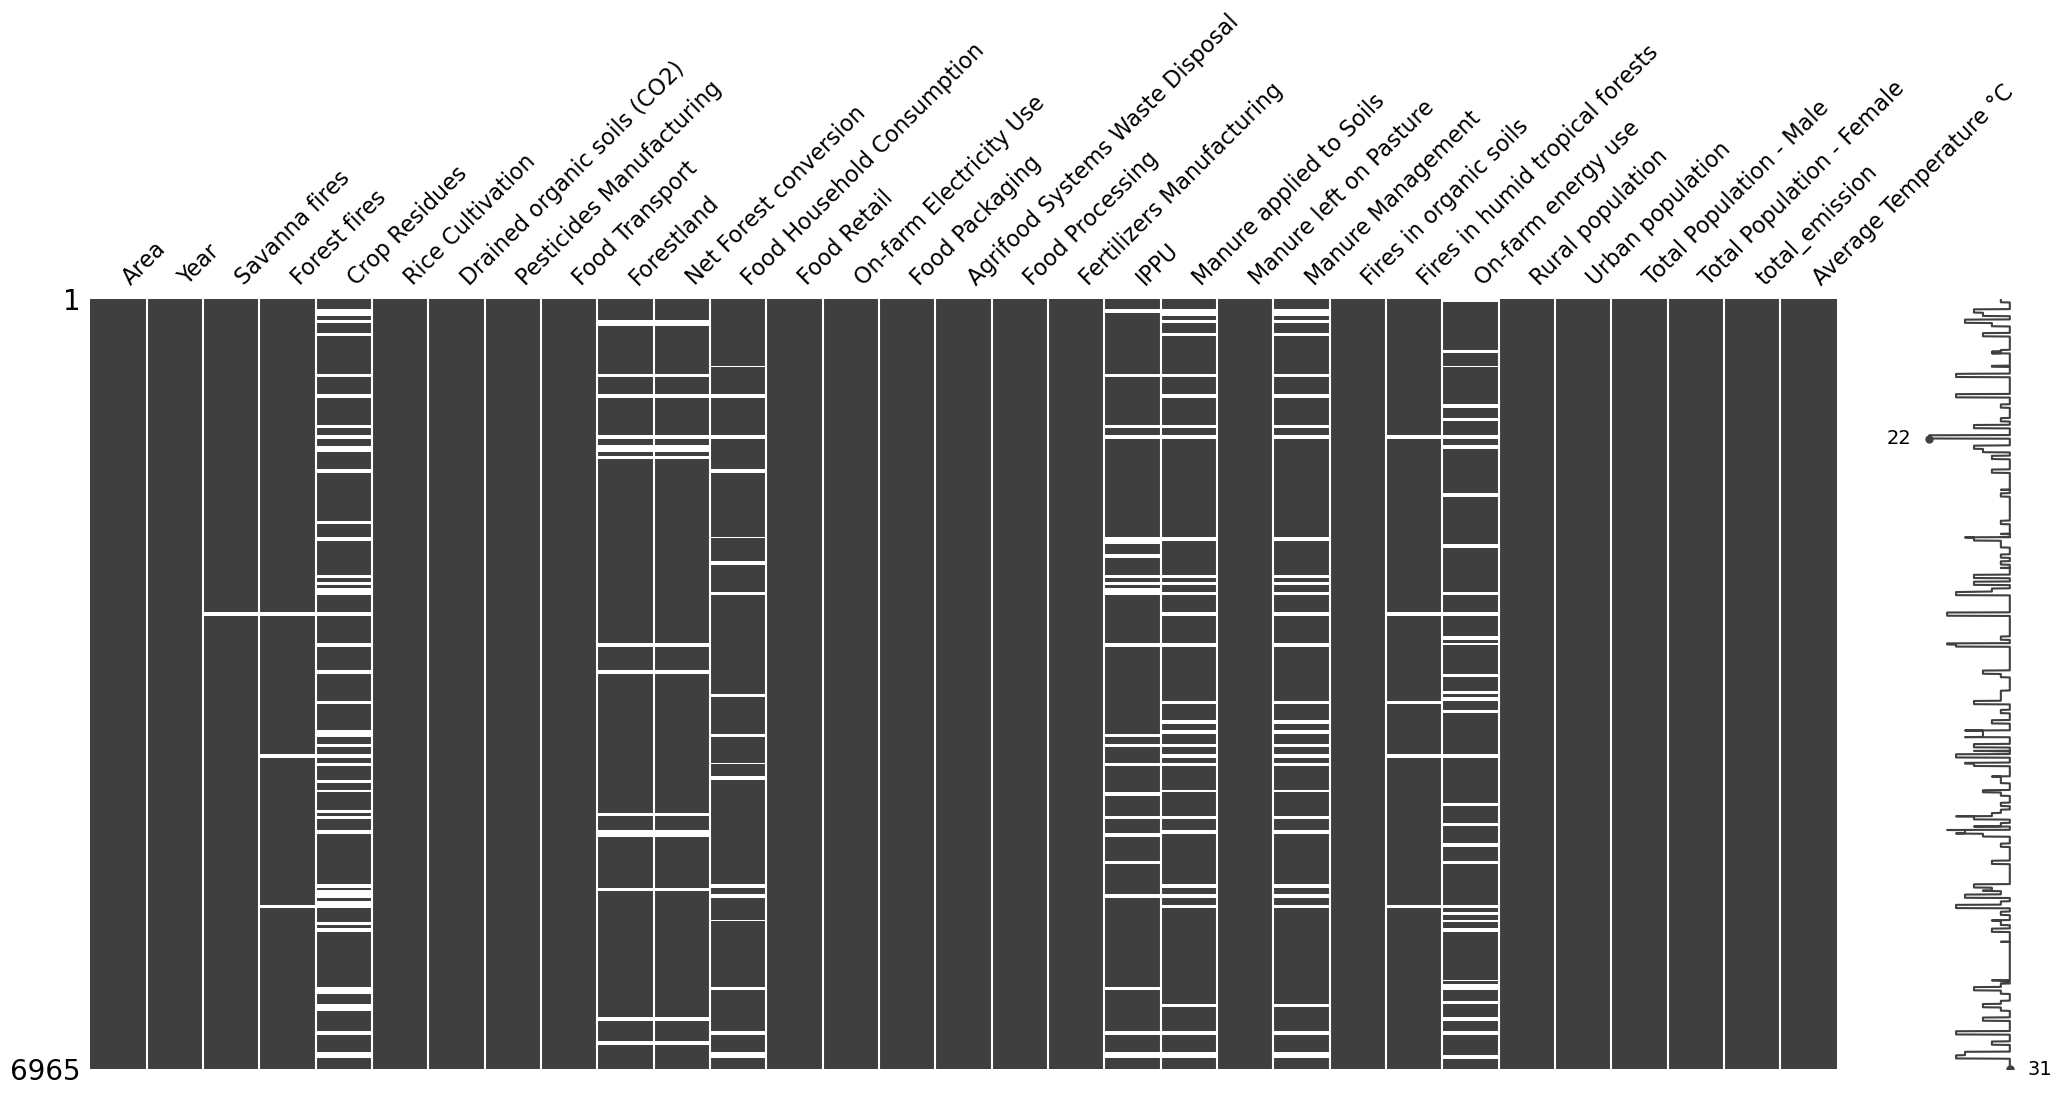

In [12]:
msno.matrix(df)

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [14]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
 
# Step 1: Data Cleaning
 
# Load the dataset

df = pd.read_csv('co2_emissions_from_agri.csv')
 
# Display the first few rows of the dataset

print("First few rows of the dataset:")

print(df.head())
 
# Handle missing values

# Option 1: Drop rows with missing values

df_cleaned = df.dropna()
 
# Option 2: Fill missing values with a specific value (e.g., 0 or mean)

# df_cleaned = df.fillna(0)

# df_cleaned = df.fillna(df.mean())
 
# Convert data types if necessary (example: converting year to integer)

df_cleaned.loc[:, 'Year'] = df_cleaned['Year'].astype(int)
 
# Remove duplicates

df_cleaned = df_cleaned.drop_duplicates()
 
# Display the cleaned dataset

print("Cleaned dataset:")

print(df_cleaned.head())

First few rows of the dataset:
          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  Net Forest conversion  \
0         63.1152   -2388.803      

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [16]:
 # Summary statistics
print("Summary statistics:")
print(df_cleaned.describe())

Summary statistics:
              Year  Savanna fires  Forest fires  Crop Residues  \
count  4546.000000    4546.000000   4546.000000    4546.000000   
mean   2005.298724    1578.318742   1154.424220    1202.174505   
std       8.859797    6188.105460   3788.977297    4069.987071   
min    1990.000000       0.000000      0.000000       0.004500   
25%    1998.000000       0.334500      0.048400      23.357000   
50%    2005.000000      11.354550      7.592600     132.518200   
75%    2013.000000     329.383700    222.426075     513.156025   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       4546.000000                  4546.000000   
mean        5601.932066                  5274.474704   
std        21612.516836                 19388.814454   
min            0.000000                     0.000000   
25%           90.361875                     0.000000   
50%          268.512150                   149.762

# Histogram of a numerical column (e.g., emissions)

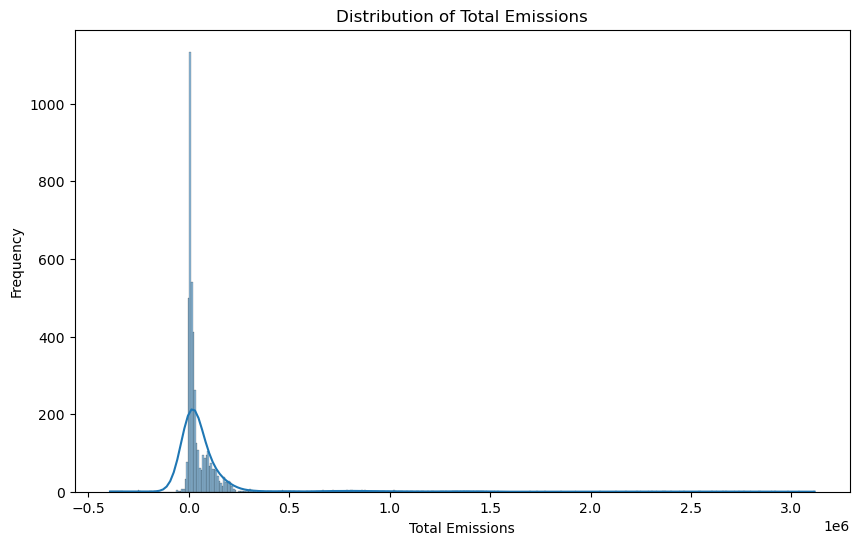

In [22]:
# Histogram of a numerical column (e.g., emissions)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['total_emission'], kde=True)
plt.title('Distribution of Total Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Frequency')
plt.show()

# Boxplot of emissions by year

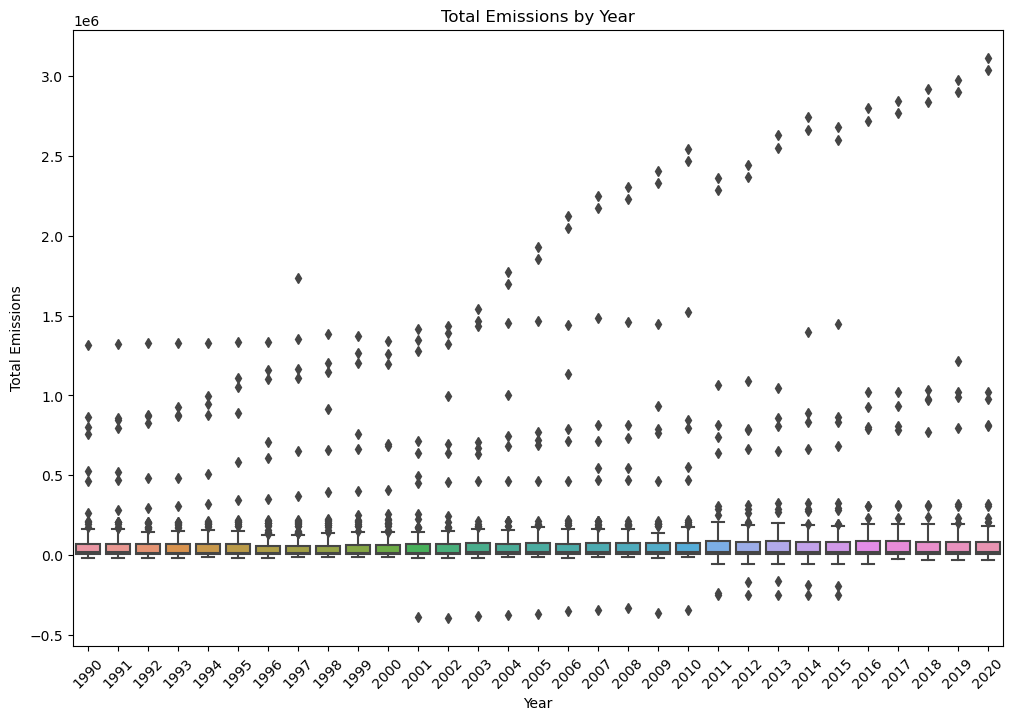

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='total_emission', data=df_cleaned)
plt.title('Total Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of emissions vs. population

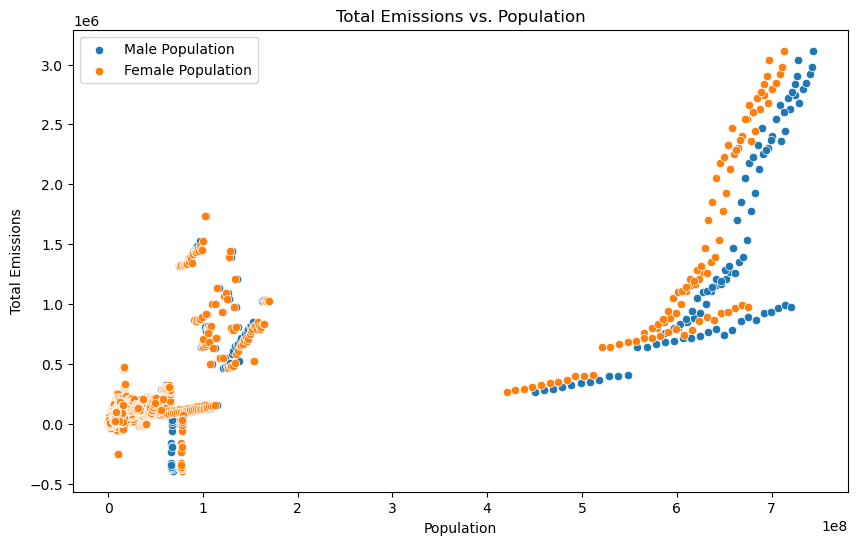

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Population - Male', y='total_emission', data=df_cleaned, label='Male Population')
sns.scatterplot(x='Total Population - Female', y='total_emission', data=df_cleaned, label='Female Population')
plt.title('Total Emissions vs. Population')
plt.xlabel('Population')
plt.ylabel('Total Emissions')
plt.legend()
plt.show()

# Correlation matrix

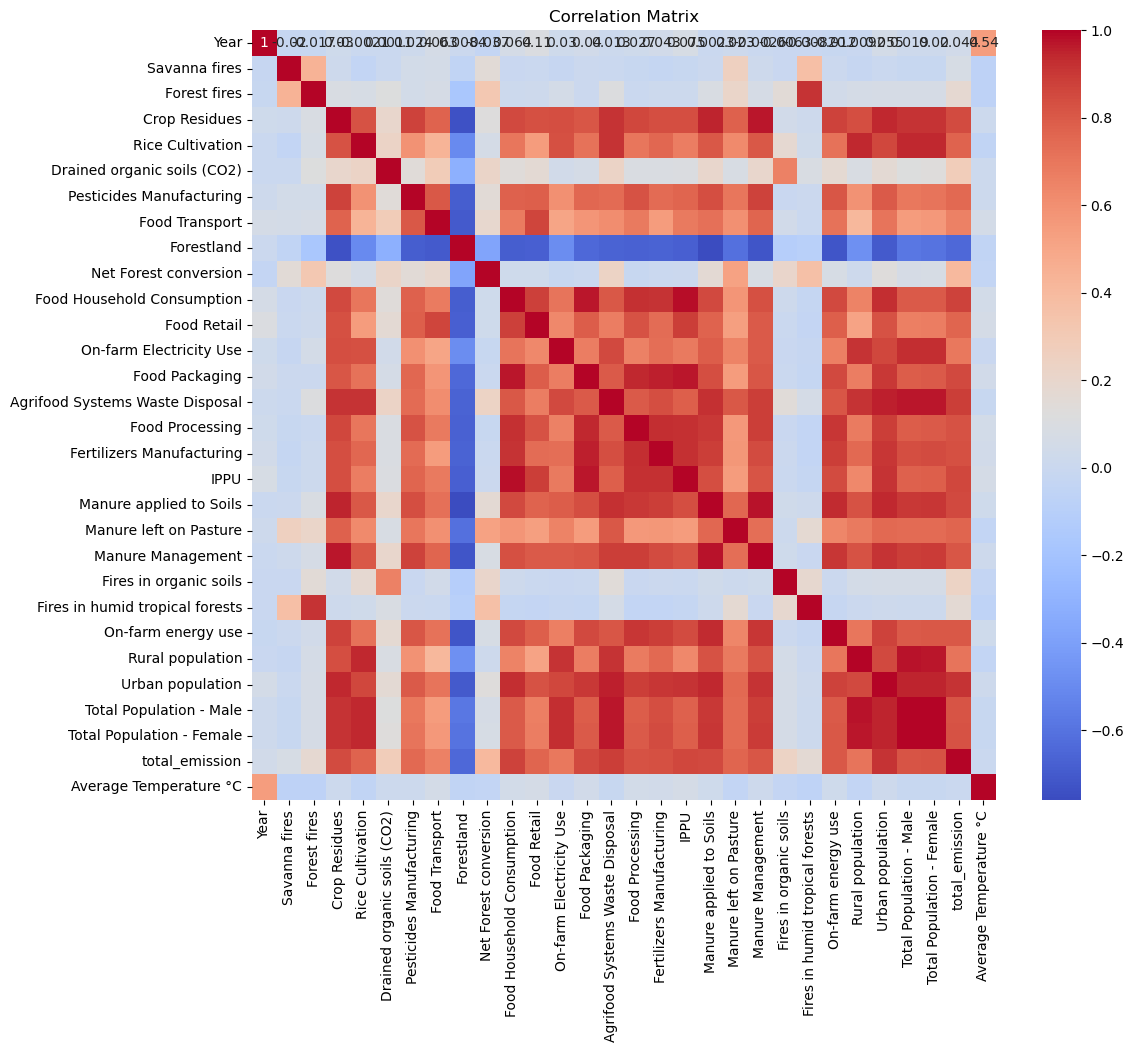

In [28]:
plt.figure(figsize=(12, 10))
# Select only numeric columns for the correlation matrix
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
correlation_matrix = df_cleaned[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
